# Intended For Visualization Purposes Only

In [7]:
# import packages needed to create dataframe and plot

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data Into Dataframe:

In [9]:
# data location of .bag-converted .csv files:

velocity_location = pd.read_csv('../data/raw/velocity_data.csv')
odometry_location = pd.read_csv('../data/raw/odometry_data.csv')
standard_location = pd.read_csv('../data/raw/standard_data.csv')
wrench_location = pd.read_csv('../data/raw/wrench_data.csv')

In [13]:
# load datas into dataframes.
velocity_df = pd.read_csv(velocity_location)
odometry_df = pd.read_csv(odometry_location)
standard_df = pd.read_csv(standard_location)
wrench_df = pd.read_csv(wrench_location)

In [14]:
# using .head(), read first five rows of data frames.
velocity_df.head()

,Unnamed: 0,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,0,1.464818e+09,0.169401,0.0,0.0,0.0,0.0,NaN
1,1,1.464818e+09,-0.063698,0.0,0.0,0.0,0.0,NaN
2,2,1.464818e+09,0.217496,0.0,0.0,0.0,0.0,NaN
3,3,1.464818e+09,-0.112279,0.0,0.0,0.0,0.0,NaN
4,4,1.464818e+09,0.102366,0.0,0.0,0.0,0.0,NaN


In [32]:
odometry_df.head()

,Unnamed: 0,Time,header.seq,header.frame_id,child_frame_id,pose.x,pose.y,pose.z,orientation.x,orientation.y,orientation.z,orientation.w,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,0,1.464818e+09,39500,/odom,base_link,505759.707787,3.564595e+06,716.135317,-0.002930,0.006255,-0.003309,0.999971,0.015346,0.000013,-0.067276,NaN,NaN,NaN
1,1,1.464818e+09,39501,/odom,base_link,505759.709308,3.564595e+06,716.128454,-0.002930,0.006256,-0.003316,0.999971,0.015542,0.000535,-0.069148,NaN,NaN,NaN
2,2,1.464818e+09,39502,/odom,base_link,505759.710857,3.564595e+06,716.121424,-0.002934,0.006252,-0.003311,0.999971,0.015293,0.000015,-0.070843,NaN,NaN,NaN
3,3,1.464818e+09,39503,/odom,base_link,505759.703280,3.564595e+06,716.148587,-0.002929,0.006248,-0.003308,0.999971,0.015200,-0.000652,-0.072371,NaN,NaN,NaN
4,4,1.464818e+09,39504,/odom,base_link,505759.704779,3.564595e+06,716.141270,-0.002918,0.006249,-0.003314,0.999971,0.014602,-0.000466,-0.073985,NaN,NaN,NaN


In [16]:
standard_df.head()

,Unnamed: 0,Time,data
0,0,1.464818e+09,0.000001
1,1,1.464818e+09,-0.078539
2,2,1.464818e+09,0.000001
3,3,1.464818e+09,-0.078539
4,4,1.464818e+09,-0.069812


In [17]:
wrench_df.head()

,Unnamed: 0,Time,force.x,force.y,force.z,torque.x,torque.y,torque.z
0,0,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0


## Explaining Data:

Our data, each respective ".csv" file, is generated from the "origin.bag" file. Using our Intel RealSense D4315i camera, data was recorded in and saved in a ".bag" format. We used a python script (convert.py) to convert our "origin.bag" file into ".csv" files that we will perform exploratory data analysis (EDA) in the cleaning data section below. Each respective dataset will also receive a brief explanation below.

- <b>velocity_data</b>: This dataset currently contains 8 columns and 263 rows respectively. Currently there is time, linear and angular data represented as variables 'linear.x', 'linear.y', 'linear.z', 'angular.x', 'angular.y', and 'angular.z'. There is also one current column called 'Unnamed: 0' which is a copy of index values. This column will be cleaned out later in the EDA data cleaning section.
- <b>odometry_data</b>: The shape of this dataset is currently 560 rows by 18 columns. Data within this dataset contain time, header_sequence, frame_id, position data, orientation data, linear data, and angular data. With regards to the position, orientation, linear, and angular data, each of these data sections are represented with 3 columns each separated into x,y,z variables. Similarly, the 'Unnamed: 0' column here will also need to be cleaned out. 
- <b>standard_data</b>:The shape of this dataset is currently 4183 rows by 3 columns. There is time, and messages data, as well as the 'Unnamed: 0' columnm, which will also have to be cleaned.
- <b>wrench_data</b>: The shape of this dataframe is currently 1118 rows by 8 columns. The data in this dataframe contain time, force and torque data. The force and torque data is represented in the variables 'force.x', 'force.y', 'force.z', 'torque.x', 'torque.y', and 'torque.z' respectively. Likewise, 'Unnamed: 0' will also have to be cleaned here.


# Cleaning The Dataframe:

In [36]:
# In all the loaded dataframes, remove "Unnamed: 0" column, as it is a repeat of frame indicies.
velocity_cleaned = velocity_df.drop(["Unnamed: 0"], axis=1)
odometry_cleaned = odometry_df.drop(["Unnamed: 0"], axis=1)
standard_cleaned = standard_df.drop(["Unnamed: 0"], axis=1)
wrench_cleaned = wrench_df.drop(["Unnamed: 0"], axis=1)

In [37]:
# show that the data frames are now cleaned without any extra columns.
velocity_cleaned.head(1)

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.464818e+09,0.169401,0.0,0.0,0.0,0.0,NaN


In [43]:
odometry_cleaned.head(1)

,Time,header.seq,header.frame_id,child_frame_id,pose.x,pose.y,pose.z,orientation.x,orientation.y,orientation.z,orientation.w,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.464818e+09,39500,/odom,base_link,505759.707787,3.564595e+06,716.135317,-0.00293,0.006255,-0.003309,0.999971,0.015346,0.000013,-0.067276,NaN,NaN,NaN


In [42]:
standard_cleaned.head(1)

,Time,data
0,1.464818e+09,0.000001


In [41]:
wrench_cleaned.head(1)

,Time,force.x,force.y,force.z,torque.x,torque.y,torque.z
0,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning data:

As mentioned earlier in this notebook, each of our respective datasets have the column 'Unnamed: 0' which is equivalently the index. This data is not meaningful data and removing this column will be reduce the amount of data being worked with. Above, we have outputted one row from each dataframe to showcase the removal of this column. 

- <b>note</b>: In future edits, we are likely to manipulate the 'Time' column data into a format that is easier to understand.

# Exploratory Data Analysis:

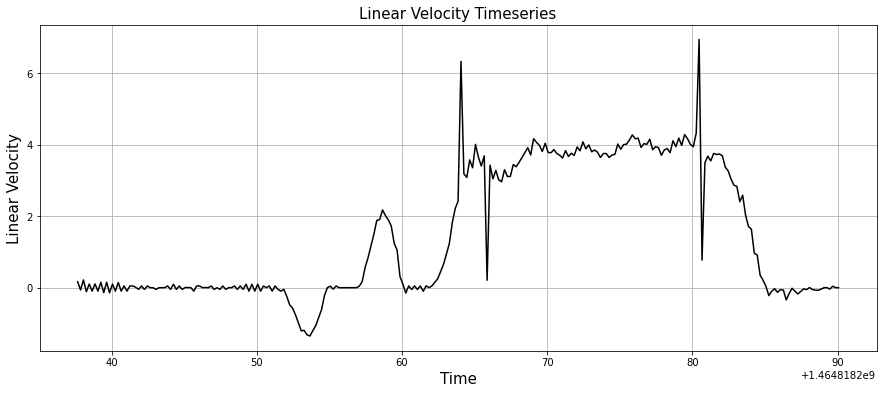

In [91]:
# plot velocity data using matplotlib.

plt.plot(velocity_cleaned['Time'], velocity_cleaned['linear.x'], color='black')
plt.title('Linear Velocity Timeseries', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Linear Velocity', fontsize=15)
plt.grid()
plt.show()

The linear velocity dataframe shows that there exists only data for linear.x columns. This is because the vehicle is only moving in the x-direction. The changes in linear velocity is displayed in the graph.

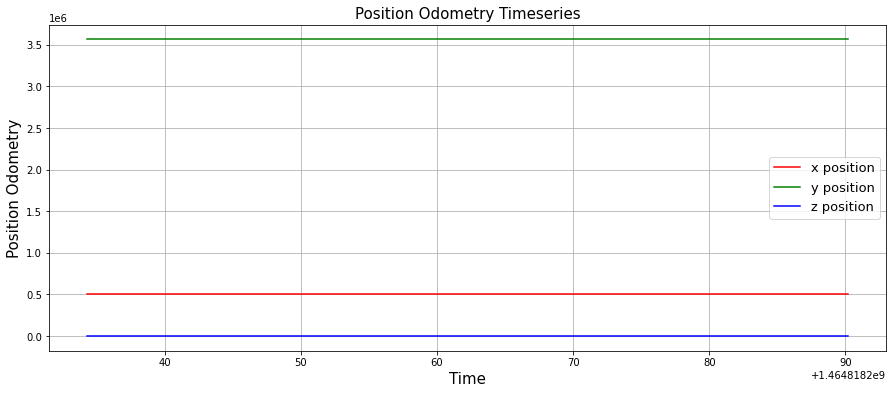

In [74]:
# plot the positional odometry data using matplotlib.

plt.plot(odometry_cleaned['Time'], odometry_cleaned['pose.x'], color='r', label='x position')
plt.plot(odometry_cleaned['Time'], odometry_cleaned['pose.y'], color='g', label='y position')
plt.plot(odometry_cleaned['Time'], odometry_cleaned['pose.z'], color='b', label='z position')
plt.title('Position Odometry Timeseries', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Position Odometry', fontsize=15)
plt.legend(fontsize=13)
plt.grid()
plt.show()

The positional odometry data is unchanged throughout the collection of the data, because the position (location) of the wheel is unchanged. This is reflected in the horizontal line graphs.

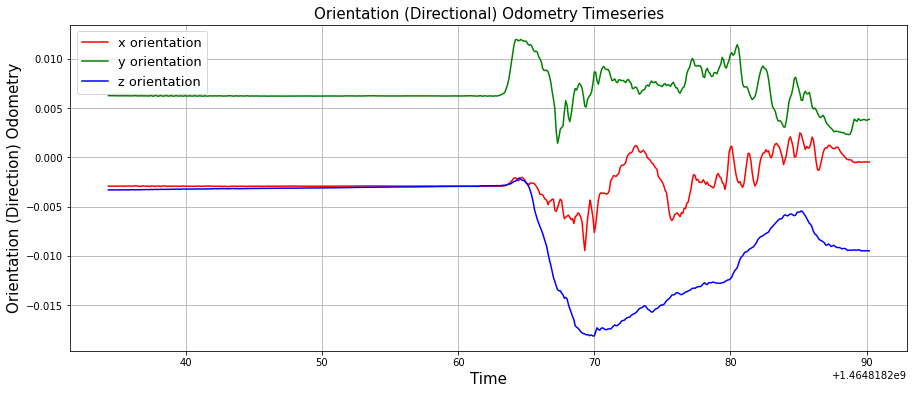

In [75]:
# plot the orientation(directional) odometry data using matplotlib.

plt.plot(odometry_cleaned['Time'], odometry_cleaned['orientation.x'], color='r', label='x orientation')
plt.plot(odometry_cleaned['Time'], odometry_cleaned['orientation.y'], color='g', label='y orientation')
plt.plot(odometry_cleaned['Time'], odometry_cleaned['orientation.z'], color='b', label='z orientation')
plt.title('Orientation (Directional) Odometry Timeseries', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Orientation (Direction) Odometry', fontsize=15)
plt.legend(fontsize=13)
plt.grid()
plt.show()

Orientational odometry data explains what direction the wheel is moving towards. 
In the data received, the wheels change direction at approximately the same time, changing the graph's overall shape for the three orientational axes.

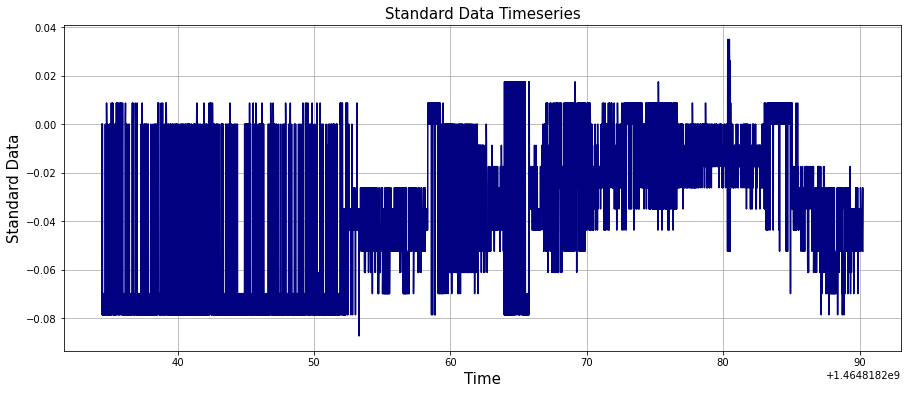

In [92]:
# plot the standard data using matplotlib.

plt.plot(standard_cleaned['Time'], standard_cleaned['data'], color='navy')
plt.title('Standard Data Timeseries', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Standard Data', fontsize=15)
plt.grid()
plt.show()

The time data used to plot the graph is measured in nano-seconds, which is why the data is congested.
In the future, we plan to scale the data using camera settings to increase legibility.

In [88]:
# show that there was no torque data generated using .sample on wrench dataframe.

wrench_cleaned.sample(10)

,Time,force.x,force.y,force.z,torque.x,torque.y,torque.z
946,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
1035,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
1110,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
884,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
617,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
441,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
203,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
947,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
1,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0
437,1.464818e+09,0.0,0.0,0.0,0.0,0.0,0.0


There was no torque (rotational force) given to the vehicle, so there exists no data for plotting.